In [3]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

In [4]:
# Load data
data = np.loadtxt("../data/longretallsamps.tsv.gz")[:,2:]

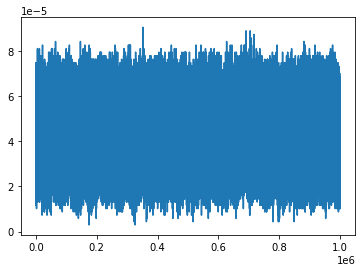

In [43]:
plt.plot(data[10])

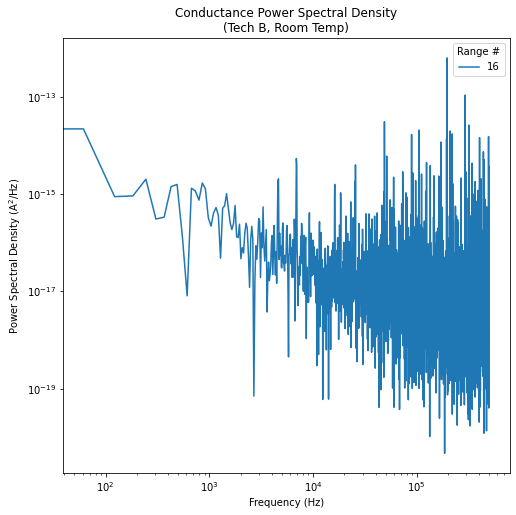

In [66]:
# Plot power spectral density (PSD)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.set_title("Conductance Power Spectral Density\n(Tech B, Room Temp)")
for addr in [16]: #list(range(0, 32, 8)) + [31]:
    f, p = signal.welch(data[addr,:16384], fs=1e6, nperseg=16384, average='median')
    plt.plot(f, p, label=addr)
ax.legend(title="Range #", ncol=2)
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Power Spectral Density (A$^2$/Hz)")
ax.set_xscale("log")
ax.set_yscale("log")
plt.show()

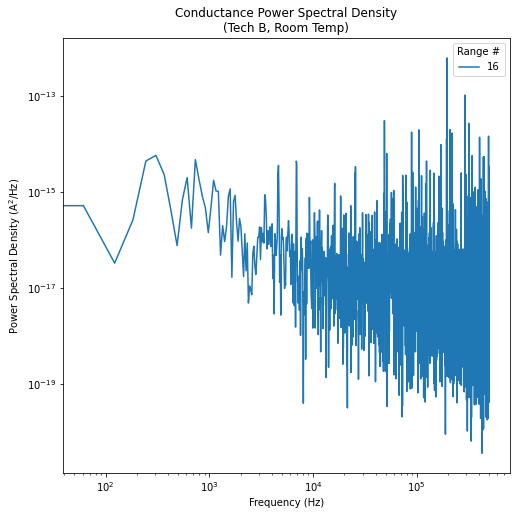

In [67]:
# Plot power spectral density (PSD)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.set_title("Conductance Power Spectral Density\n(Tech B, Room Temp)")
for addr in [16]: #list(range(0, 32, 8)) + [31]:
    f, p = signal.welch(data[addr,-16384:], fs=1e6, nperseg=16384, average='median')
    plt.plot(f, p, label=addr)
ax.legend(title="Range #", ncol=2)
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Power Spectral Density (A$^2$/Hz)")
ax.set_xscale("log")
ax.set_yscale("log")
#ax.set_xlim(10, 2e4)
plt.show()

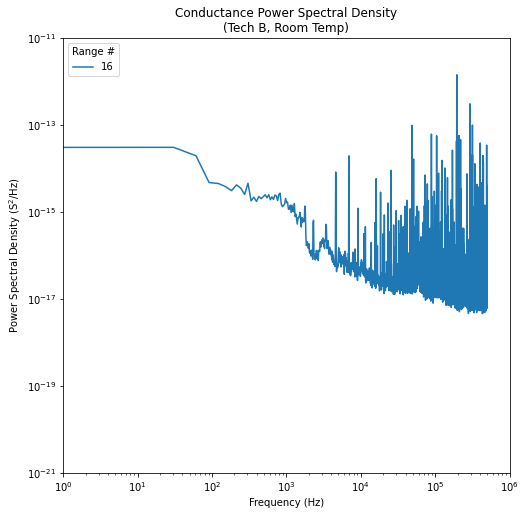

In [10]:
# Plot power spectral density (PSD)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.set_title("Conductance Power Spectral Density\n(Tech B, Room Temp)")
for addr in [16]: #list(range(0, 32, 8)) + [31]:
    f, p = signal.welch(data[addr], fs=1e6, nperseg=32768, average='median')
    plt.plot(f, p, label=addr)
ax.legend(title="Range #", ncol=2)
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Power Spectral Density (S$^2$/Hz)")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(1, 1e6)
ax.set_ylim(1e-21, 1e-11)
plt.show()

(1000, 5000)


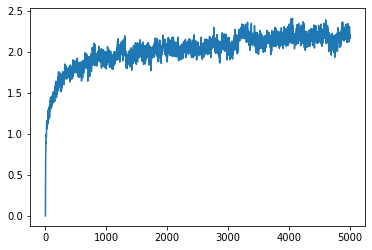

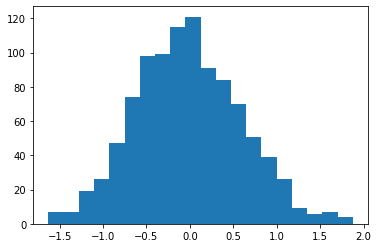

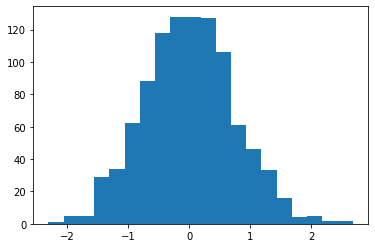

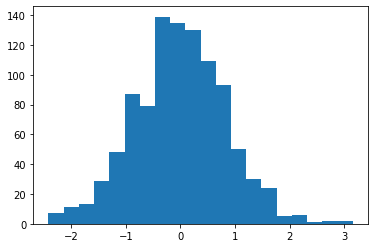

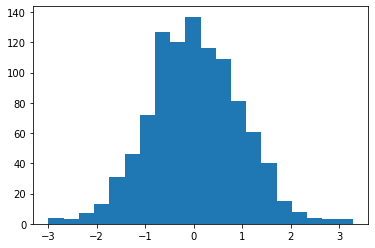

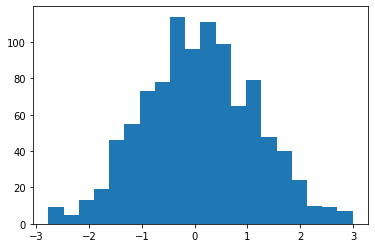

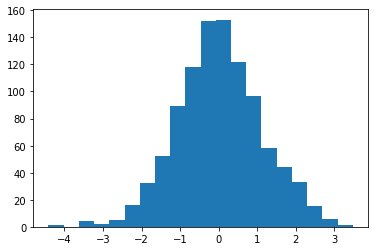

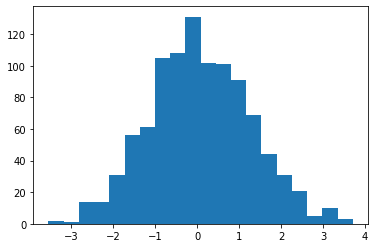

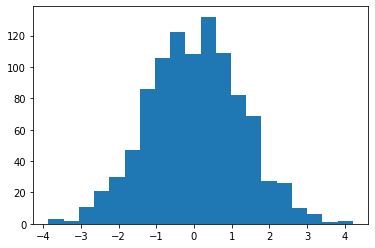

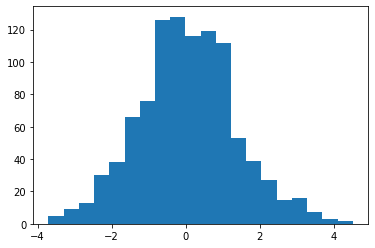

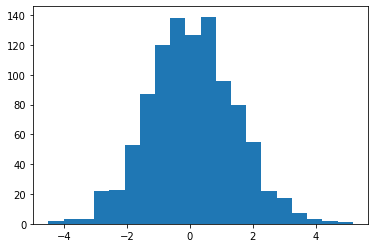

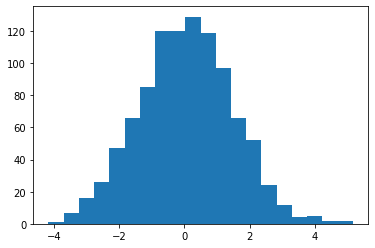

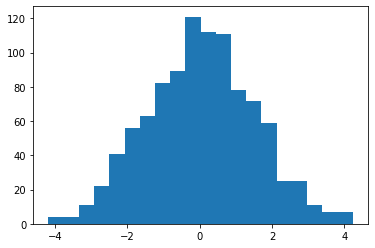

In [1]:
import colorednoise as cn, numpy as np, matplotlib.pyplot as plt
beta = 1 # the exponent
nsamps = 10000
data = []
for _ in range(1000):
    y = cn.powerlaw_psd_gaussian(beta, nsamps)[:nsamps//2]
    y = [yv-y[0] for yv in y]
    data.append(y)
data = np.array(data)
print(data.shape)
stds = np.var(data, axis=0)
plt.plot(stds)
plt.show()

for i in [1,2,5,10,20,50,100,200,500,1000,2000,4999]:
    plt.hist(data[:,i], bins=20)
    plt.show()
#plt.show()

#plt.psd(y)
#plt.xscale("log")